In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset=pd.read_csv("C:\\Users\\aneel\\OneDrive\\Desktop\\TrainingTefoLogic\\Titanic Dataset.csv")

In [3]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
dataset.drop(['Cabin','Embarked','Name','Ticket'],axis=1,inplace=True)

In [6]:
income_set=set(dataset['Sex'])
dataset['Sex']=dataset['Sex'].map({'female':0,'male':1}).astype(int)  # replacing the string data into integer
print(dataset.head)

<bound method NDFrame.head of      PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0              1         0       3    1  22.0      1      0   7.2500
1              2         1       1    0  38.0      1      0  71.2833
2              3         1       3    0  26.0      0      0   7.9250
3              4         1       1    0  35.0      1      0  53.1000
4              5         0       3    1  35.0      0      0   8.0500
..           ...       ...     ...  ...   ...    ...    ...      ...
886          887         0       2    1  27.0      0      0  13.0000
887          888         1       1    0  19.0      0      0  30.0000
888          889         0       3    0   NaN      1      2  23.4500
889          890         1       1    1  26.0      0      0  30.0000
890          891         0       3    1  32.0      0      0   7.7500

[891 rows x 8 columns]>


In [7]:
x=dataset.drop('Survived',axis='columns')
y=dataset.Survived

In [8]:
x.columns[x.isna().any()]

Index(['Age'], dtype='object')

In [9]:
x.Age=x.Age.fillna(29.8)

In [10]:
x.columns[x.isna().any()]

Index([], dtype='object')

In [11]:
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,1,22.0,1,0,7.2500
1,2,1,0,38.0,1,0,71.2833
2,3,3,0,26.0,0,0,7.9250
3,4,1,0,35.0,1,0,53.1000
4,5,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,2,1,27.0,0,0,13.0000
887,888,1,0,19.0,0,0,30.0000
888,889,3,0,29.8,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [12]:
dataset

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000
887,888,1,1,0,19.0,0,0,30.0000
888,889,0,3,0,NaN,1,2,23.4500
889,890,1,1,1,26.0,0,0,30.0000


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [14]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [15]:
y_pred=model.predict(x_test)

In [16]:
from sklearn.metrics import accuracy_score
print("accuracy of model {}%".format(accuracy_score(y_pred,y_test)*100))

accuracy of model 80.22388059701493%


In [17]:
import seaborn as sns
from matplotlib.legend_handler import HandlerBase
import matplotlib.pyplot as plt

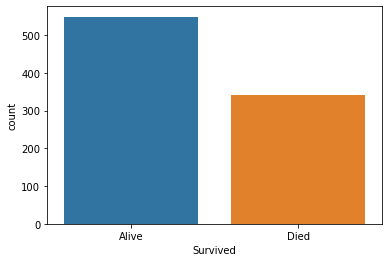

In [18]:
dataset.replace({'Survived':{0:'Alive',1:'Died'}},inplace=True)
ax=sns.countplot(x = 'Survived', data = dataset)
plt.show()

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)

array([[142,  27],
       [ 26,  73]], dtype=int64)

In [20]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1], dtype=int64)

In [21]:
slr=np.stack((y_pred,y_test),axis=1)
slr

array([[0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 0],
       [1, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [1, 0],
       [1, 1],
       [1, 0],
       [1, 1],
       [0, 0],
       [1,

In [22]:
pclass=int(input("enter a persons class: "))
sex=int(input("enter male for 1 and female for 0 : "))
age=int(input("enter your age:"))
fare=float(input("enter person fare: "))
passengerID=float(input("enter Passenger ID:"))
sibsp=int(input("enter persons sibsp:"))
parch=int(input("enter persons parch:"))
person=[[pclass,sex,age,fare,passengerID,sibsp,parch]]
result=model.predict(person)
print(result)
if result==1:
  print("person will be survived")
else:
  print("person will not be survived")

enter a persons class: 0
enter male for 1 and female for 0 : 1
enter your age:0
enter person fare: 1
enter Passenger ID:0
enter persons sibsp:1
enter persons parch:0
[1]
person will be survived


In [23]:
import pandas as pd
data=pd.read_csv("C:\\Users\\aneel\\OneDrive\\Desktop\\TrainingTefoLogic\\Titanic Dataset.csv")

In [24]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [25]:
data.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],axis=1,inplace=True)

In [26]:
data

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S
...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S
887,1,1,female,19.0,30.0000,S
888,0,3,female,NaN,23.4500,S
889,1,1,male,26.0,30.0000,C


In [27]:
data1=pd.get_dummies(data,columns=['Embarked'],dtype=int)

In [28]:
data1

,Survived,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,7.2500,0,0,1
1,1,1,female,38.0,71.2833,1,0,0
2,1,3,female,26.0,7.9250,0,0,1
3,1,1,female,35.0,53.1000,0,0,1
4,0,3,male,35.0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,0,0,1
887,1,1,female,19.0,30.0000,0,0,1
888,0,3,female,NaN,23.4500,0,0,1
889,1,1,male,26.0,30.0000,1,0,0


In [29]:
income_set=set(data1['Sex'])
data1['Sex']=data1['Sex'].map({'female':0,'male':1}).astype(int)  # replacing the string data into integer
print(data1.head)

<bound method NDFrame.head of      Survived  Pclass  Sex   Age     Fare  Embarked_C  Embarked_Q  Embarked_S
0           0       3    1  22.0   7.2500           0           0           1
1           1       1    0  38.0  71.2833           1           0           0
2           1       3    0  26.0   7.9250           0           0           1
3           1       1    0  35.0  53.1000           0           0           1
4           0       3    1  35.0   8.0500           0           0           1
..        ...     ...  ...   ...      ...         ...         ...         ...
886         0       2    1  27.0  13.0000           0           0           1
887         1       1    0  19.0  30.0000           0           0           1
888         0       3    0   NaN  23.4500           0           0           1
889         1       1    1  26.0  30.0000           1           0           0
890         0       3    1  32.0   7.7500           0           1           0

[891 rows x 8 columns]>


In [30]:
data1.columns[data1.isna().any()]

Index(['Age'], dtype='object')

In [31]:
colnames=list(data1)
colnames

['Survived',
 'Pclass',
 'Sex',
 'Age',
 'Fare',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [32]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=3)

In [33]:
data_filled=imputer.fit_transform(data1)

In [34]:
data1=pd.DataFrame(data=data_filled,columns=colnames)

In [35]:
data1

,Survived,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3.0,1.0,22.000000,7.2500,0.0,0.0,1.0
1,1.0,1.0,0.0,38.000000,71.2833,1.0,0.0,0.0
2,1.0,3.0,0.0,26.000000,7.9250,0.0,0.0,1.0
3,1.0,1.0,0.0,35.000000,53.1000,0.0,0.0,1.0
4,0.0,3.0,1.0,35.000000,8.0500,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
886,0.0,2.0,1.0,27.000000,13.0000,0.0,0.0,1.0
887,1.0,1.0,0.0,19.000000,30.0000,0.0,0.0,1.0
888,0.0,3.0,0.0,21.333333,23.4500,0.0,0.0,1.0
889,1.0,1.0,1.0,26.000000,30.0000,1.0,0.0,0.0


In [36]:
data1['Age'].unique()

array([22.        , 38.        , 26.        , 35.        , 58.66666667,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 35.66666667,
       31.        , 16.66666667, 34.        , 15.        , 28.        ,
        8.        , 38.5       , 19.        , 40.        , 26.97333333,
       18.        , 66.        , 42.        , 23.66666667, 21.        ,
       32.16666667,  3.        , 25.33333333, 36.        , 18.66666667,
        7.        , 49.        , 29.        , 65.        , 43.        ,
       28.5       ,  5.        , 11.        , 45.        , 33.        ,
       17.        , 32.        , 16.        , 25.        ,  0.83      ,
       30.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 24.33333333, 22.66666667, 47.        ,
       14.5       , 70.5       , 32.5       , 12.        , 14.66666667,
        9.        , 36.5       , 51.        , 55.5       , 40.5 

In [37]:
x1=data1.drop('Survived',axis='columns')
y1=data1.Survived

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=0)

In [39]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [40]:
y_pred=model.predict(x_test)

In [41]:
from sklearn.metrics import accuracy_score
print("accuracy of model {}%".format(accuracy_score(y_pred,y_test)*100))

accuracy of model 79.82062780269058%
